In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

In [43]:
elden_palette = ["#FFD700", "#FFA500", "#FF6347", "#CD853F", "#8B4513", "#A0522D", "#696969", "#2F4F4F", "#8B0000", "#4B0082"]
plt.style.use('dark_background')
sns.set_style("darkgrid", {"axes.facecolor": ".15", "grid.color": ".4"})

In [44]:
def clean_data(df):
    """Clean and prepare the weapon data"""
    df = df.iloc[1:].reset_index(drop=True)
    numeric_cols = ['Phy', 'Mag', 'Fir', 'Lit', 'Hol', 'Cri', 'Sta', 'Wgt']
    for col in numeric_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col].replace('-', '0'), errors='coerce').fillna(0)
    
    # Calculate useful metrics
    df['Total_Damage'] = df['Phy'] + df['Mag'] + df['Fir'] + df['Lit'] + df['Hol']
    df['Damage_Per_Weight'] = np.where(df['Wgt'] > 0, df['Total_Damage'] / df['Wgt'], 0)
    return df

In [45]:
def create_weapon_analysis(df, top_n=15):
    """Create a focused 2-chart analysis showing individual weapon names with their damage stats"""
    
    fig = plt.figure(figsize=(22, 14))
    gs = GridSpec(2, 1, height_ratios=[1, 1], hspace=0.5)
    ax1 = plt.subplot(gs[0])
    top_damage_weapons = df.nlargest(top_n, 'Total_Damage')
    
    bars1 = ax1.barh(range(len(top_damage_weapons)), top_damage_weapons['Total_Damage'], 
                     color=elden_palette[:len(top_damage_weapons)])
    
    ax1.set_yticks(range(len(top_damage_weapons)))
    ax1.set_yticklabels(top_damage_weapons['Name'].tolist(), fontsize=11, color='white')
    ax1.set_xlabel('Total Damage', fontsize=14, color='white')
    ax1.set_title('Top 15 Individual Weapons by Total Damage', 
                  fontsize=18, color='black', fontweight='bold', pad=20)
    for i, (idx, weapon) in enumerate(top_damage_weapons.iterrows()):
        damage = weapon['Total_Damage']
        weapon_type = weapon['Type']
        if damage > 400:
            damage_color = '#FF0000'  # Very high damage - bright red
        elif damage > 300:
            damage_color = '#FF6347'  # High damage - red
        elif damage > 200:
            damage_color = '#FFA500'  # Medium damage - orange  
        else:
            damage_color = '#FFD700'  # Lower damage - gold
            
        ax1.text(damage + 5, i, 
                f'{damage:.0f} ({weapon_type})', 
                va='center', fontweight='bold', fontsize=10, color=damage_color)
    
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(colors='white')
    ax1.set_xlim(0, max(top_damage_weapons['Total_Damage']) * 1.2)
    
    # Chart 2
    ax2 = plt.subplot(gs[1])

    efficient_weapons = df[df['Wgt'] > 0].nlargest(top_n, 'Damage_Per_Weight')
    
    bars2 = ax2.barh(range(len(efficient_weapons)), efficient_weapons['Damage_Per_Weight'], 
                     color=elden_palette[:len(efficient_weapons)])
    
    ax2.set_yticks(range(len(efficient_weapons)))
    ax2.set_yticklabels(efficient_weapons['Name'].tolist(), fontsize=11, color='white')
    ax2.set_xlabel('Damage per Weight Unit (Higher = More Efficient)', fontsize=14, color='white')
    ax2.set_title('Top 15 Individual Weapons by Efficiency (Damage/Weight)', 
                  fontsize=18, color='black', fontweight='bold', pad=20)
    
    for i, (idx, weapon) in enumerate(efficient_weapons.iterrows()):
        efficiency = weapon['Damage_Per_Weight']
        weapon_type = weapon['Type']
        weight = weapon['Wgt']
        total_dmg = weapon['Total_Damage']
        
        if efficiency > 25:
            eff_color = '#00FF00'  # Very efficient - bright green
        elif efficiency > 20:
            eff_color = '#90EE90'  # Good efficiency - light green
        elif efficiency > 15:
            eff_color = '#FFFF00'  # Decent - yellow
        elif efficiency > 10:
            eff_color = '#FFD700'  # Average - gold
        else:
            eff_color = '#FF6347'  # Poor efficiency - red
            
        ax2.text(efficiency + 0.5, i, 
                f'{efficiency:.1f} ({total_dmg:.0f}dmg, {weight:.1f}wgt)', 
                va='center', fontweight='bold', fontsize=9, color=eff_color)
    
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(colors='white')
    ax2.set_xlim(0, max(efficient_weapons['Damage_Per_Weight']) * 1.25)
    
    # Add explanatory text
    fig.text(0.02, 0.02, 
             'Top chart: Individual weapons with highest total damage - specific weapon names you can find in-game\n'
             'Bottom chart: Individual weapons with best damage-to-weight ratio - perfect for agile builds\n'
             'These are the exact weapon names to look for when playing!',
             fontsize=11, color='#CCCCCC', style='italic')
    
    plt.tight_layout()
    return fig

In [46]:
def get_top_weapons_by_category(df, category='efficiency', top_n=5):
    """Get specific weapon recommendations"""
    if category == 'efficiency':
        return df.nlargest(top_n, 'Damage_Per_Weight')[['Name', 'Type', 'Total_Damage', 'Damage_Per_Weight', 'Wgt']]
    elif category == 'damage':
        return df.nlargest(top_n, 'Total_Damage')[['Name', 'Type', 'Total_Damage', 'Damage_Per_Weight', 'Wgt']]
    elif category == 'physical':
        return df.nlargest(top_n, 'Phy')[['Name', 'Type', 'Phy', 'Total_Damage', 'Wgt']]
        return df.nlargest(top_n, 'Damage_Per_Weight')[['Name', 'Type', 'Total_Damage', 'Damage_Per_Weight', 'Wgt']]
    elif category == 'damage':
        return df.nlargest(top_n, 'Total_Damage')[['Name', 'Type', 'Total_Damage', 'Damage_Per_Weight', 'Wgt']]
    elif category == 'physical':
        return df.nlargest(top_n, 'Phy')[['Name', 'Type', 'Phy', 'Total_Damage', 'Wgt']]

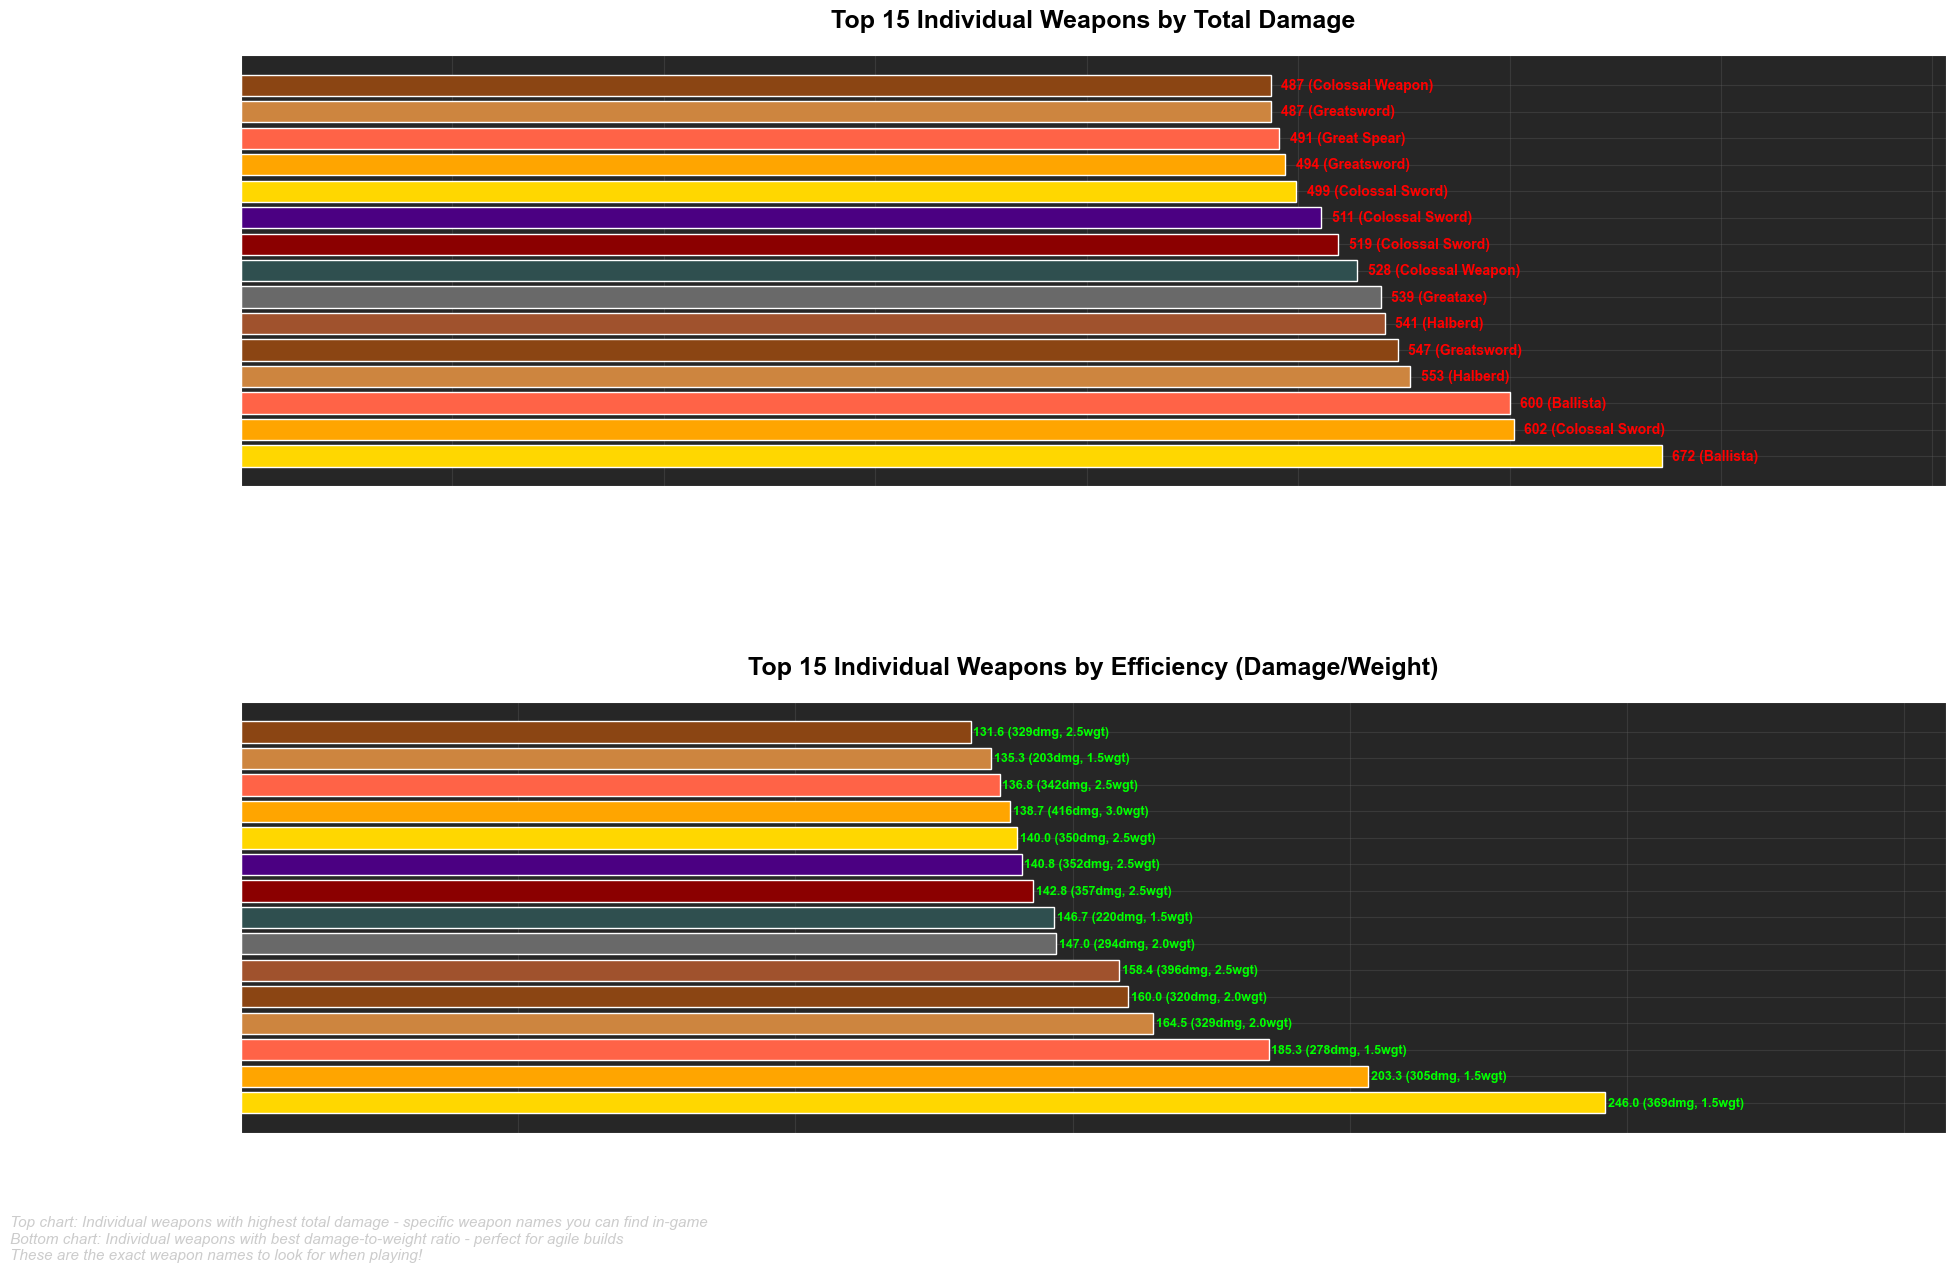

In [47]:
df = pd.read_csv('elden_ring_weapon.csv') 
df = clean_data(df)
fig = create_weapon_analysis(df)
plt.show()